# PyTorch learning by book

## Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES=True

/home/artem/micromamba/envs/ml/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/artem/micromamba/envs/ml/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
torch.__version__

'2.0.0.post200'

# Chapter 1

## Tensors

In [3]:
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
x

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

In [4]:
x[0][0] = 5
x

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])

In [5]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [6]:
torch.ones(1, 2) + torch.ones(1, 2)

tensor([[2., 2.]])

In [7]:
torch.rand(1).item()

0.08021223545074463

In [8]:
cpu_tensor = torch.rand(2)
cpu_tensor.device

device(type='cpu')

In [9]:
gpu_tensor = cpu_tensor.to("cuda")
gpu_tensor.device

/home/artem/micromamba/envs/ml/lib/python3.10/site-packages/torch/cuda/__init__.py:152: UserWarning: 
    Found GPU0 Quadro K5000 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


device(type='cuda', index=0)

In [10]:
x = torch.rand(2,2)

In [11]:
x.max()

tensor(0.8647)

In [12]:
x.argmax()

tensor(2)

In [13]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
long_tensor.type()

'torch.LongTensor'

In [14]:
float_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]]).to(dtype=torch.float32)
float_tensor.type()

'torch.FloatTensor'

In [15]:
flat_tensor = torch.rand(784)

In [18]:
flat_tensor.shape

torch.Size([784])

In [19]:
flat_tensor.view(1, 28, 28).shape

torch.Size([1, 28, 28])

In [20]:
flat_tensor.reshape(1, 28, 28).shape

torch.Size([1, 28, 28])

Разницы view и reshape

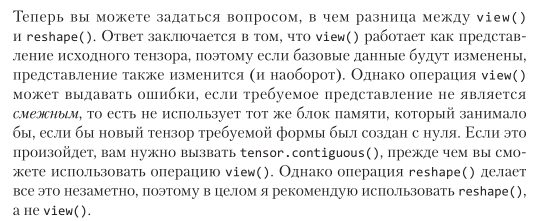

Реализацич inplace

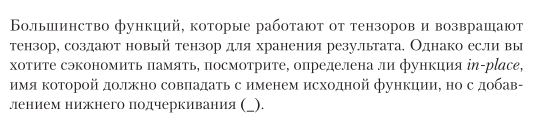

In [25]:
random_tensor = torch.rand(2,2)

In [26]:
random_tensor.log2()

tensor([[-2.7380, -1.1987],
        [-0.0716, -0.2196]])

In [27]:
random_tensor

tensor([[0.1499, 0.4357],
        [0.9516, 0.8588]])

In [28]:
random_tensor.log2_()

tensor([[-2.7380, -1.1987],
        [-0.0716, -0.2196]])

In [29]:
random_tensor

tensor([[-2.7380, -1.1987],
        [-0.0716, -0.2196]])

Как менять оси

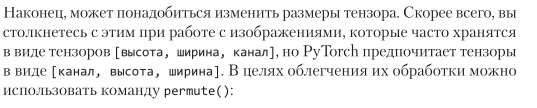

In [30]:
hwc_tensor = torch.rand(640, 480, 3)
chw_tensor = hwc_tensor.permute(2,0,1)
chw_tensor.shape

torch.Size([3, 640, 480])

## Chapter 2

Класс датасета

In [3]:
class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError
    def __len__(self):
        raise NotImplementedError

Обучающая выборка

In [4]:
train_data_path = "./data/images/train/"

In [5]:
transforms = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])
])
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=transforms)

In [6]:
# Resize 64 x 64
# to tensor
# Normalize

In [7]:
train_data

Dataset ImageFolder
    Number of datapoints: 787
    Root location: ./data/images/train/
    StandardTransform
Transform: Compose(
               Resize(size=64, interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

Валидация

In [8]:
val_data_path = './data/images/val'
val_data = torchvision.datasets.ImageFolder(root=val_data_path, transform=transforms)

Тест

In [9]:
test_data_path = "./data/images/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=transforms)

In [10]:
batch_size=64
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

Neural Network

In [13]:
class SimpleNN(nn.Module):
    def __init__(self) -> None:
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(12288, 84)
        self.fc2 = nn.Linear(84, 50)
        self.fc3 = nn.Linear(50, 2)

    def forward(self):
        x = x.view(-1, 12288)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x

In [19]:
simplenet = SimpleNN()

Optimizer

In [20]:
import torch.optim as optim
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [21]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [22]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

simplenet.to(device)

/home/artem/micromamba/envs/ml/lib/python3.10/site-packages/torch/cuda/__init__.py:152: UserWarning: 
    Found GPU0 Quadro K5000 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


SimpleNN(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)